<a href="https://colab.research.google.com/github/Saurav-Raghaw/Optimization/blob/main/Real_world.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

import operator 
import math

In [83]:
df = pd.read_csv('/content/hour.csv')

In [84]:
df_new = df[df.cnt < 500]

In [85]:
def scale(x):
    min = x.min()
    max = x.max()
    return pd.Series([(i - min)/(max - min) for i in x])

In [86]:
x = df_new['temp']
y = scale(df_new.cnt)

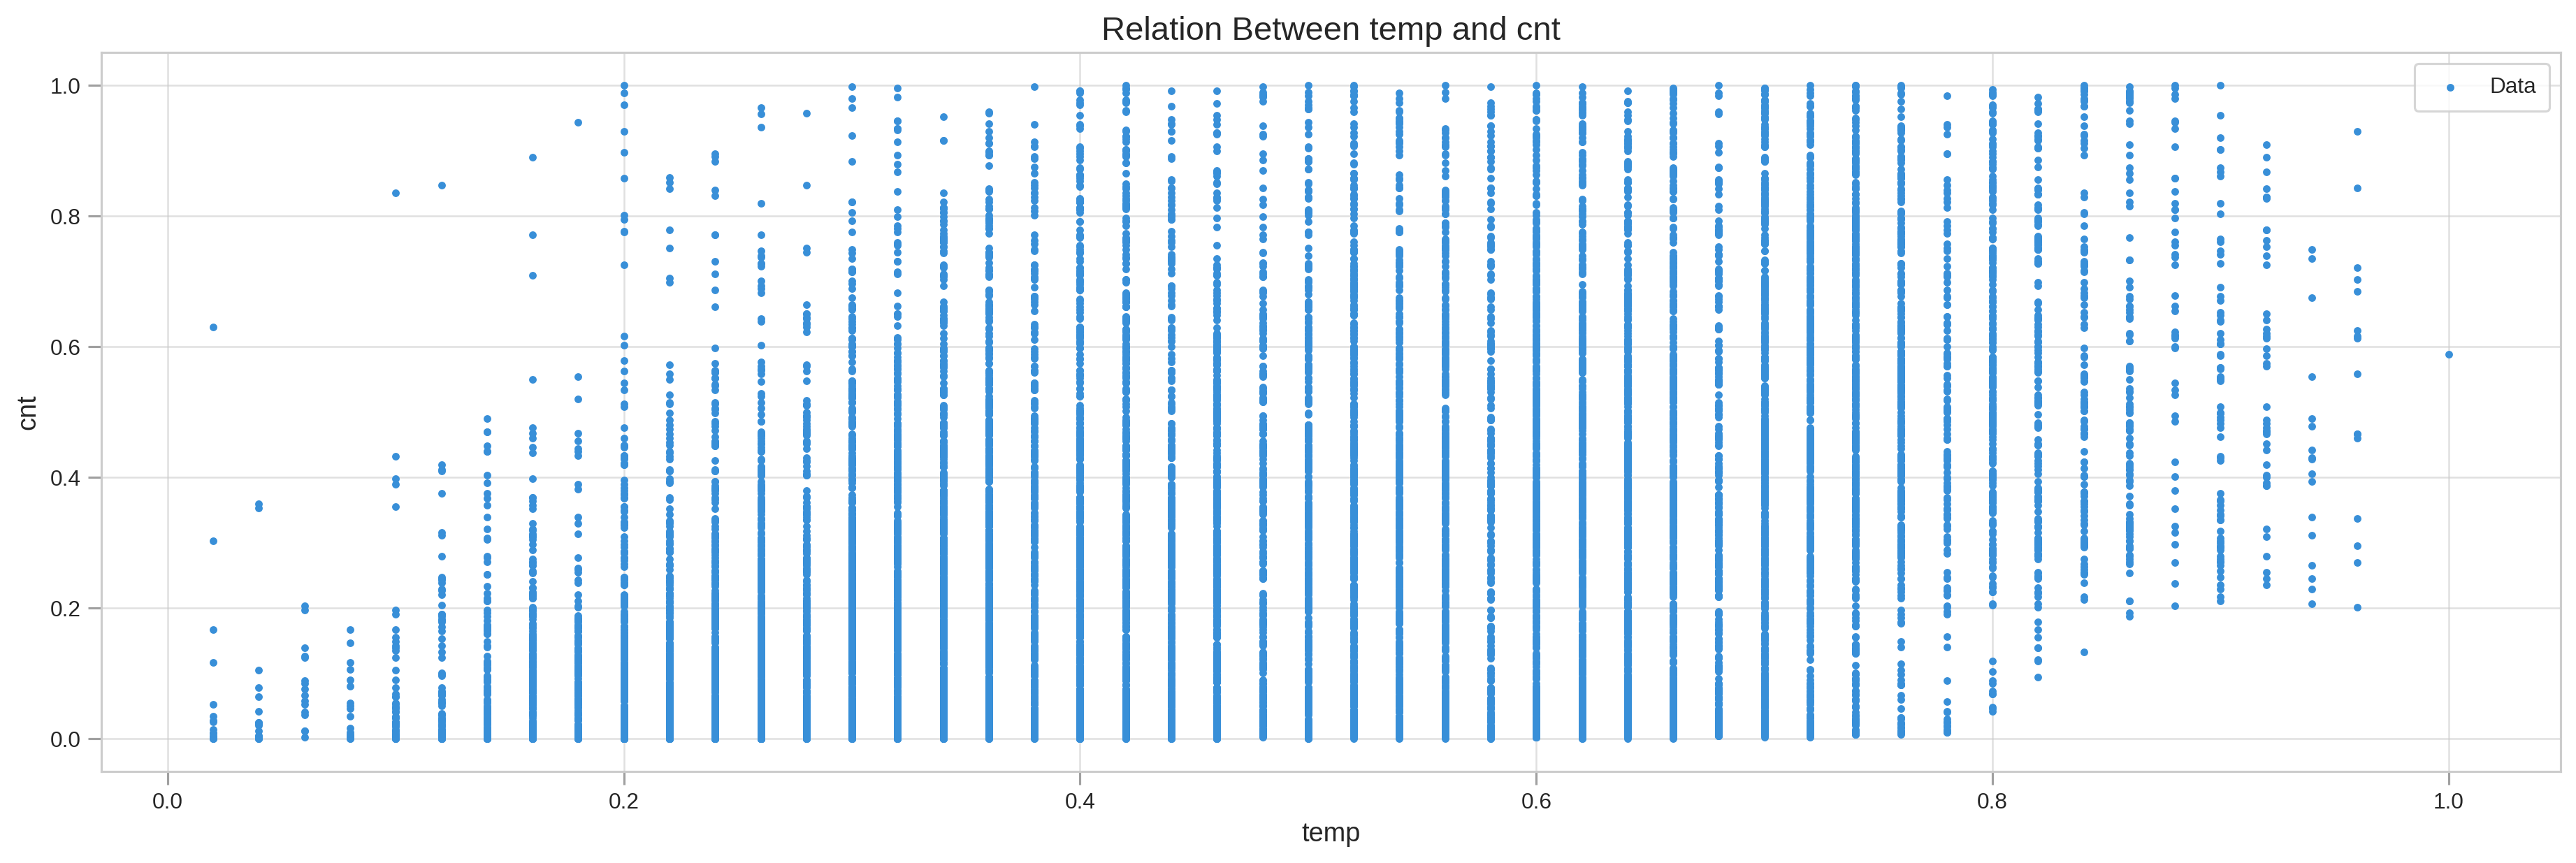

In [87]:
plt.figure(figsize=(20,6))
plt.rcParams['figure.dpi'] = 227
plt.style.use('seaborn-whitegrid')

plt.scatter(x, y, label='Data', c='#388fd8', s=6)

plt.title('Relation Between temp and cnt', fontSize=15)
plt.xlabel('temp', fontSize=12)
plt.ylabel('cnt', fontSize=12)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
plt.tick_params(direction='out', length=6, color='#a0a0a0', width=1, grid_alpha=.6)
plt.show()

In [88]:
class UnivariateLinearRegression:
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.m = ((np.mean(X) * np.mean(y) - np.mean(X*y)) / ((np.mean(X)**2) - np.mean(X**2)))
        self.b = np.mean(y) - self.m * np.mean(X)
    
    def coeffs(self):
        return self.m, self.b
    
    def predict(self):
        self.y_pred = self.m * self.X + self.b
        return self.y_pred
    
    def r_squared(self):
        self.y_mean = np.full((len(self.y)), mean(self.y))
        err_reg = sum((self.y - self.y_pred)**2)
        err_y_mean = sum((self.y - self.y_mean)**2)
        return (1 - (err_reg/err_y_mean))

In [89]:
def plot_regression(X, y, y_pred, log=None, title="Linear Regression"):
    
    plt.figure(figsize=(20,6))
    plt.rcParams['figure.dpi'] = 227
    plt.scatter(X, y, label='Data', c='#388fd8', s=6)
    if log != None:
        for i in range(len(log)):
            plt.plot(X, log[i][0]*X + log[i][1], lw=1, c='#caa727', alpha=0.35)
    plt.plot(X, y_pred, c='#ff7702', lw=3, label='Regression')
    plt.title(title, fontSize=14)
    plt.xlabel('temp', fontSize=11)
    plt.ylabel('cnt', fontSize=11)
    plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
    plt.tick_params(direction='out', length=6, color='#a0a0a0', width=1, grid_alpha=.6)
    plt.show()

In [90]:
lr = UnivariateLinearRegression()
lr.fit(x, y)
y_pred = lr.predict()

MSE: 0.06036862963818121


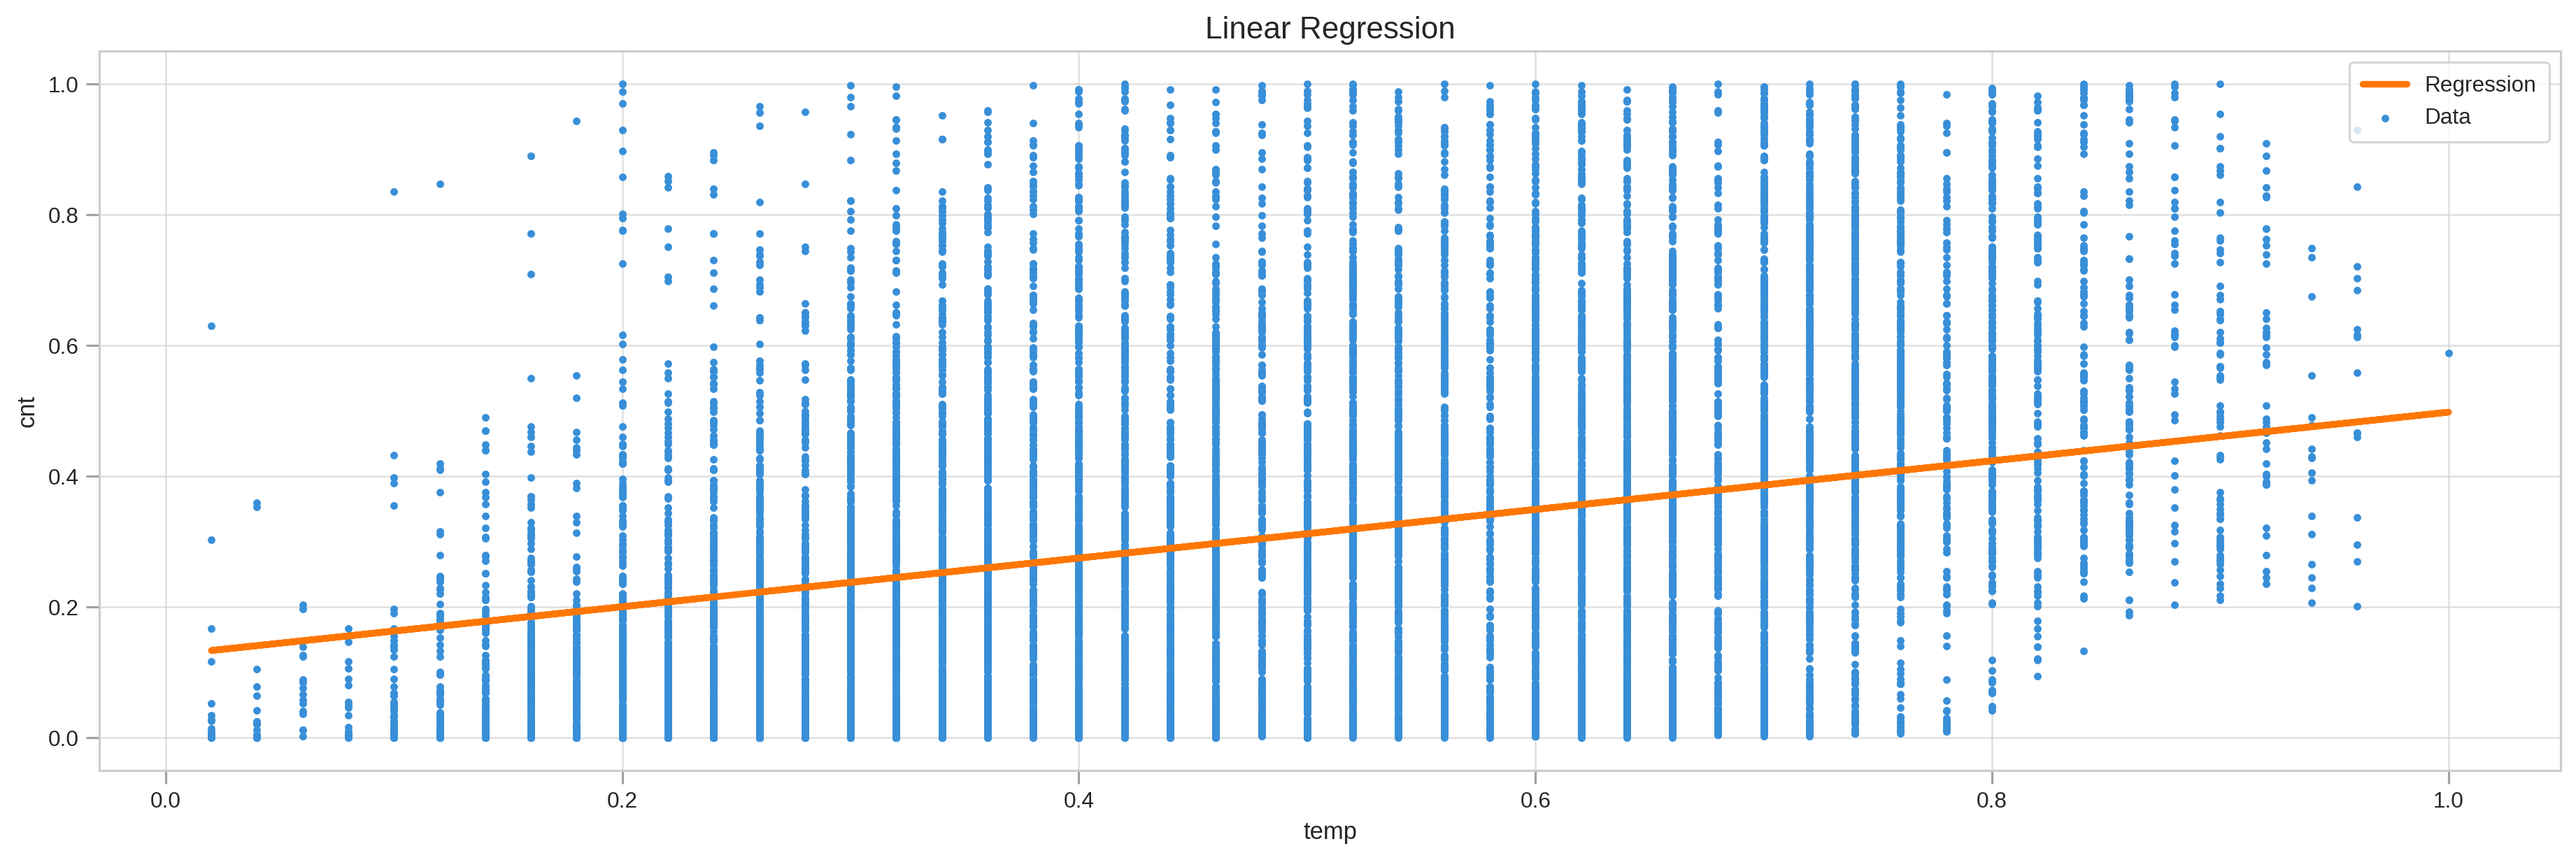

In [91]:
print("MSE:",mean_squared_error(y, y_pred))
plot_regression(x, y, y_pred, title="Linear Regression")

In [92]:
def gradient_descent(X, y, lr=0.05, epoch=10):
    
    m, b = 0.5, 0.5 # parameters
    log, mse = [], [] # lists to store learning process
    N = len(X) # number of samples
    
    for _ in range(epoch):
                
        f = y - (m*X + b)
    
        # Updating m and b
        m -= lr * (-2 * (X*f).sum() / N)
        b -= lr * (-2 * f.sum() / N)
        
        log.append((m, b))
        mse.append(mean_squared_error(y, (m*X + b)))        
    
    return m, b, log, mse

In [93]:
%%time
m, b, log, mse1 = gradient_descent(x, y, lr=0.01, epoch=20)

CPU times: user 109 ms, sys: 3.08 ms, total: 112 ms
Wall time: 124 ms


In [94]:
y_pred = m*x + b

In [95]:
%%time
mean_squared_error(y, y_pred)

CPU times: user 868 µs, sys: 0 ns, total: 868 µs
Wall time: 878 µs


0.13194581956683288

In [96]:
def SGD(X, y, lr=0.05, epoch=10, batch_size=1): # if batch_size is more than 1 then it become mini-batch SGD

    
    m, b = 0.5, 0.5 # initial parameters
    log, mse = [], [] # lists to store learning process
    
    for _ in range(epoch):
        
        indexes = np.random.randint(0, len(X), batch_size) # random sample
        
        Xs = np.take(X, indexes)
        ys = np.take(y, indexes)
        N = len(Xs)
        
        f = ys - (m*Xs + b)
        
        # Updating parameters m and b
        m -= lr * (-2 * (Xs*f).sum() / N)
        b -= lr * (-2 * f.sum() / N)
        
        log.append((m, b))
        mse.append(mean_squared_error(y, m*X+b))        
    
    return m, b, log, mse

In [97]:
%%time
m, b, log, mse2 = SGD(x, y, lr=0.01, epoch=20, batch_size=1)

CPU times: user 57.6 ms, sys: 1.69 ms, total: 59.3 ms
Wall time: 61.4 ms


In [98]:
y_pred = m*x + b
print("MSE:",mean_squared_error(y, y_pred))

MSE: 0.2095241772194561


In [99]:
def mini_batch_SGD(X, y, lr=0.05, epoch=10, batch_size=1): 
    
    m, b = 0.5, 0.5 # initial parameters
    log, mse = [], [] # lists to store learning process
    
    for _ in range(epoch):
        
        indexes = np.random.randint(0, len(X), batch_size) # random sample
        
        Xs = np.take(X, indexes)
        ys = np.take(y, indexes)
        N = len(Xs)
        
        f = ys - (m*Xs + b)
        
        # Updating parameters m and b
        m -= lr * (-2 * (Xs*f).sum() / N)
        b -= lr * (-2 * f.sum() / N)
        
        log.append((m, b))
        mse.append(mean_squared_error(y, m*X+b))        
    
    return m, b, log, mse

In [100]:
%%time
m, b, log, mse3 = mini_batch_SGD(x, y, lr=0.01, epoch=20, batch_size=100)

CPU times: user 74.8 ms, sys: 3.2 ms, total: 78 ms
Wall time: 78.2 ms


In [101]:
%%time
y_pred = m*x + b
print("MSE:",mean_squared_error(y, y_pred))

MSE: 0.22147961044596645
CPU times: user 2.9 ms, sys: 0 ns, total: 2.9 ms
Wall time: 3.46 ms


In [102]:
def PID_Otimizer(X, y, lr=0.01, epoch=10, Kd=0.9):

  mome_para = 0.9 # momentum factor
  #Kd = 0.25*lr + 0.5 + (1 + (16/5)* (3.14)**2) / lr #Calculating the hyperparameter Kd

  m, b = 0.5, 0.5 # parameters
  log, mse = [], [] # lists to store learning process
  N = len(X) # number of samples

  vm, dt_m, vb, dt_b = 0,0,0,0 
  grad_m, grad_b, prev_grad_m,prev_grad_b= 0,0,0,0


  prev_update_b = 0
  prev_update_m = 0
  prev_update_dt_m = 0
  prev_update_dt_b = 0
    
  for _ in range(epoch):
    f = y - (m*X + b)

    # Updating m and b
    grad_m = (-2 * (X*f).sum() / N)
    grad_b = (-2 * f.sum() / N)

    vm = mome_para*prev_update_m + lr * grad_m
    dt_m = mome_para*prev_update_dt_m + (1 - mome_para) * (grad_m - prev_grad_m)

    vb = mome_para*prev_update_b + lr * grad_b
    dt_b = mome_para*prev_update_dt_b + (1 - mome_para)* (grad_b - prev_grad_b)

    prev_grad_m = grad_m
    prev_gard_b = grad_b

    m = m - vm - Kd*dt_m
    b = b - vb - Kd*dt_b

    prev_update_m = vm
    prev_update_dt_m = dt_m

    prev_update_b = vb
    prev_update_dt_b = dt_b
        
    log.append((m, b))
    mse.append(mean_squared_error(y, (m*X + b)))  

  return m, b, log, mse
 

In [191]:
%%time
m, b, log, mse_pid = PID_Otimizer(x, y, 0.01, 20, 10)

CPU times: user 89.3 ms, sys: 5.14 ms, total: 94.4 ms
Wall time: 100 ms


In [192]:
y_pred = m*x + b
print("MSE:",mean_squared_error(y, y_pred))

MSE: 0.05987108055371461


In [105]:
def APID(X, y, lr=0.05, epoch=10, Kd=0.9):

  #Kd = 0.25*lr + 0.5 + (1 + (16/5)* (3.14)**2) / lr #Calculating the hyperparameter Kd

  m, b = 0.5, 0.5 # parameters
  log, mse = [], [] # lists to store learning process
  N = len(X) # number of samples
  eps = 1e-8
  gamma = 0.9

  vt_m, dt_m, prev_vt_m, prev_dt_m, mt_m, prev_mt_m = 0,0,0,0,0,0
  vt_b, dt_b, prev_vt_b, prev_dt_b, mt_b, prev_mt_b = 0,0,0,0,0,0
  grad_m, grad_b, prev_grad_m, prev_grad_b= 0,0,0,0


  prev_b = 0
  prev_m = 0
    
  for _ in range(epoch):
    f = y - (m*X + b)

    grad_m = (-2 * (X*f).sum() / N)
    grad_b = (-2 * f.sum() / N)

    mt_m = prev_mt_m + (grad_m**2)
    vt_m = gamma*prev_vt_m + (lr*grad_m)/np.sqrt(mt_m + eps)
    dt_m = gamma*prev_dt_m + (1-gamma)*(grad_m - prev_grad_m)

    prev_mt_m = mt_m
    prev_vt_m = vt_m
    prev_dt_m = dt_m

    mt_b = prev_mt_b + (grad_b**2)
    vt_b = gamma*prev_vt_b + (lr*grad_b)/np.sqrt(mt_b + eps)
    dt_b = gamma*prev_dt_b + (1-gamma)*(grad_b - prev_grad_b)

    prev_mt_b = mt_b
    prev_vt_b = vt_b
    prev_dt_b = dt_b

    prev_grad_m = grad_m
    prev_gard_b = grad_b

    prev_m = m
    prev_b = b

    m = m - vt_m - Kd*dt_m
    b = b - vt_b - Kd*dt_b
        
    log.append((m, b))
    mse.append(mean_squared_error(y, (m*X + b)))  

  return m, b, log, mse

In [182]:
%%time
m, b, log, mse_apid = APID(x, y, 0.01, 20, 10)

CPU times: user 84.4 ms, sys: 4.88 ms, total: 89.3 ms
Wall time: 93.5 ms


In [183]:
y_pred = m*x + b
print("MSE:",mean_squared_error(y, y_pred))

MSE: 0.06008441286935308


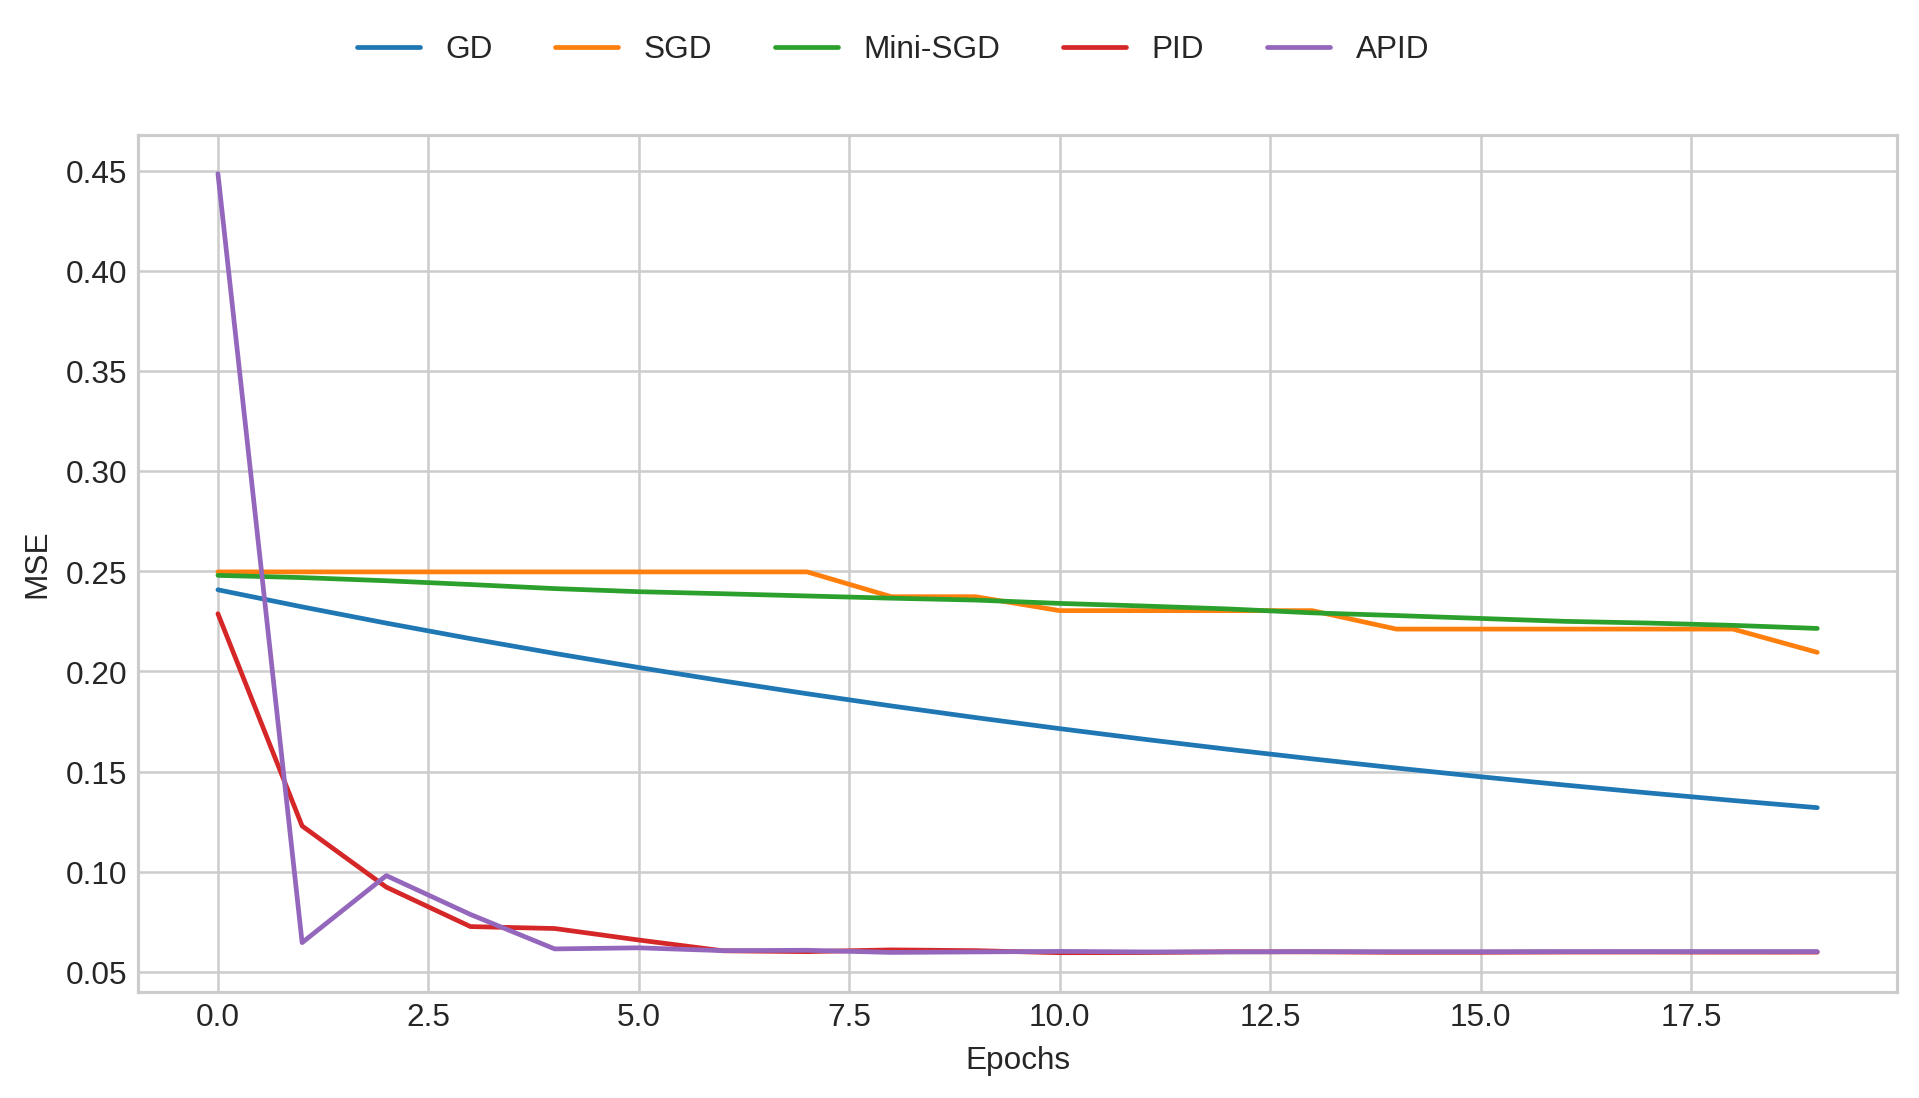

CPU times: user 464 ms, sys: 6.58 ms, total: 470 ms
Wall time: 477 ms


In [189]:
%%time
plt.figure(figsize=(10,5))
plt.rcParams['figure.dpi'] = 227
plt.plot(range(len(mse1)), mse1, label='GD')
plt.plot(range(len(mse2)), mse2, label='SGD')
plt.plot(range(len(mse3)), mse3, label='Mini-SGD')
plt.plot(range(len(mse_pid)), mse_pid, label='PID')
plt.plot(range(len(mse_apid)), mse_apid, label='APID')




#plt.title('#GD Vs SGD Vs Mini-SGD Vs PID Vs APID Optimization', fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend(bbox_to_anchor =(0.75, 1.15), ncol = 5)
plt.show()

In [190]:
def SGD_momentum(X, y, lr=0.05, epoch=10, mome_para = 0.9):
    
    m, b = 0.5, 0.5 # parameters
    log, mse = [], [] # lists to store learning process
    N = len(X) # number of samples
    prev_update_b = 0
    prev_update_m = 0
    
    for _ in range(epoch):
                
        f = y - (m*X + b)
    
        # Updating m and b
        vm = mome_para*prev_update_m + lr * (-2 * (X*f).sum() / N)
        vb = mome_para*prev_update_b + lr * (-2 * f.sum() / N)

        m = m -vm
        b = b - vb

        prev_update_m = vm
        prev_update_b = vb
        
        log.append((m, b))
        mse.append(mean_squared_error(y, (m*X + b)))        
    
    return m, b, log, mse

In [193]:
%%time
m, b, log, mse_m = SGD_momentum(x, y, lr=0.01, epoch=20, mome_para= 0.9)

CPU times: user 83.2 ms, sys: 7.06 ms, total: 90.2 ms
Wall time: 95.3 ms


In [194]:
y_pred = m*x + b
print("MSE:",mean_squared_error(y, y_pred))

MSE: 0.0862211125659579


In [112]:
def Adagrad(X, y, lr=0.05, epoch=10):
    
    m, b = 0.5, 0.5 # parameters
    log, mse = [], [] # lists to store learning process
    N = len(X) # number of samples
 
    vm,vb =0,0

    eps = 1e-8

    for i in range(epoch):
      dm, db =0,0

      f = y - (m*X + b)
      dm += lr * (-2 * (X*f).sum() / N)
      db +=  lr * (-2 * f.sum() / N)

     
      vm = vm + dm**2
      vb = vb + db**2

      #m = m - (lr/(vm + eps)) * dm
      #b = b - (lr/(vb + eps)) * db

      m = m - (lr/np.sqrt(vm + eps)) * dm
      b = b - (lr/np.sqrt(vb + eps)) * db

      log.append((m, b))
      mse.append(mean_squared_error(y, (m*X + b)))   

    return m, b, log, mse

In [196]:
%%time
m, b, log, mse_ada = Adagrad(x, y, lr=0.01, epoch=20)

CPU times: user 91.6 ms, sys: 3.23 ms, total: 94.9 ms
Wall time: 100 ms


In [197]:
y_pred = m*x + b
print("MSE:",mean_squared_error(y, y_pred))

MSE: 0.16829663949015655


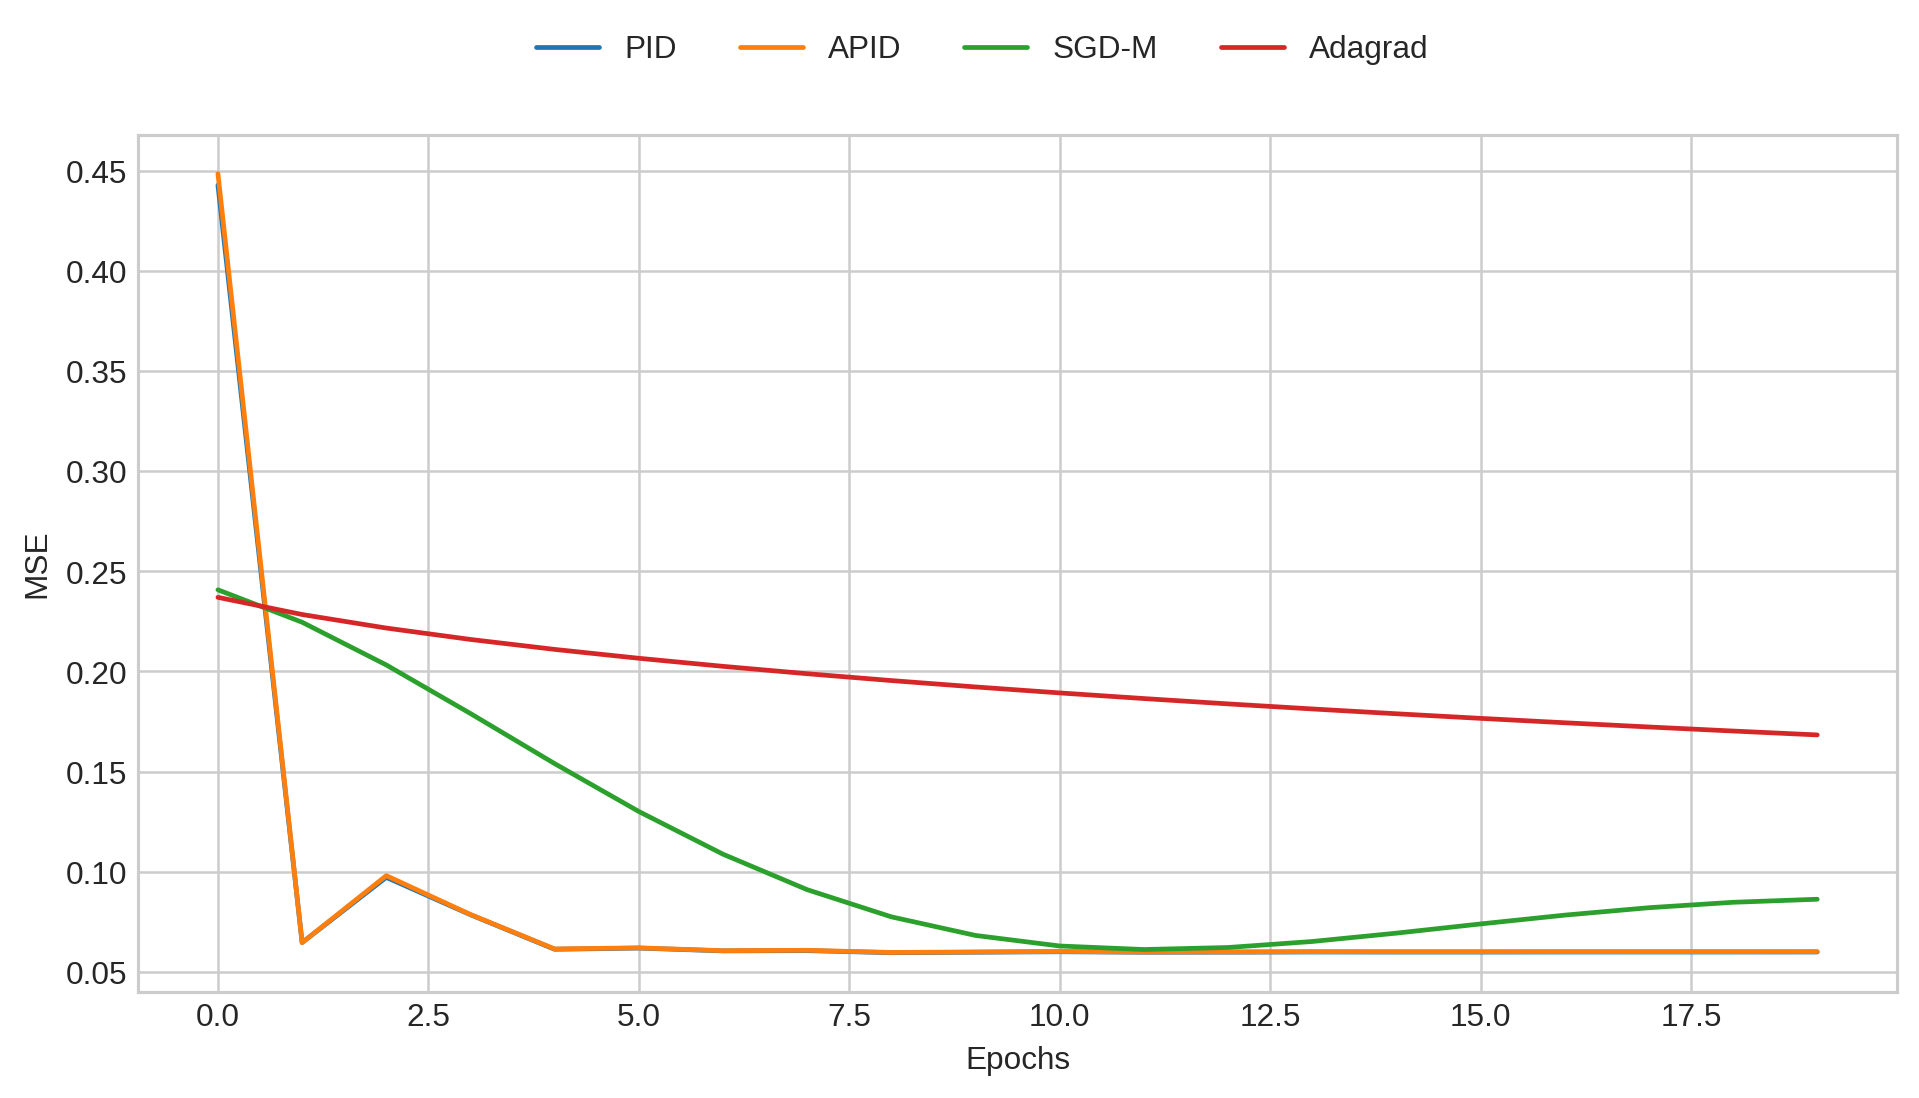

CPU times: user 454 ms, sys: 450 µs, total: 454 ms
Wall time: 456 ms


In [218]:
%%time
plt.figure(figsize=(10,5))
plt.rcParams['figure.dpi'] = 227
plt.plot(range(len(mse_pid)), mse_pid, label='PID')
plt.plot(range(len(mse_apid)), mse_apid, label='APID')
plt.plot(range(len(mse_m)), mse_m, label='SGD-M')
plt.plot(range(len(mse_ada)), mse_ada, label='Adagrad')

#plt.title('#PID Vs APID Vs SGD-M Vs Adagrad', fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend(bbox_to_anchor =(0.75, 1.15), ncol = 4)
plt.show()

In [116]:
def LPID(X, y, lr=0.05, epoch=10, Kd=0.9):

  #Kd = 0.25*lr + 0.5 + (1 + (16/5)* (3.14)**2) / lr #Calculating the hyperparameter Kd

  m, b = 0.5, 0.5 # parameters
  log, mse = [], [] # lists to store learning process
  N = len(X) # number of samples
  eps = 1e-8
  gamma = 0.9

  vt_m, dt_m, prev_vt_m, prev_dt_m, mt_m, prev_mt_m = 0,0,0,0,0,0
  vt_b, dt_b, prev_vt_b, prev_dt_b, mt_b, prev_mt_b = 0,0,0,0,0,0
  grad_m, grad_b, prev_grad_m, prev_grad_b= 0,0,0,0

  m_look_ahead, b_look_ahead, prev_m_look_ahead, prev_b_look_ahead = 0,0,0,0


  prev_b = 0
  prev_m = 0
  i=0
    
  for _ in range(epoch):
    i+=1
  
    m_look_ahead = m - gamma*prev_vt_m
    b_look_ahead = b - gamma*prev_vt_b

    f = y - (m_look_ahead*X + b_look_ahead)

    grad_m = (-2 * (X*f).sum() / N)
    grad_b = (-2 * f.sum() / N)

    vt_m = gamma*prev_vt_m + (lr*grad_m)
    vt_b = gamma*prev_vt_b + (lr*grad_b)

    dt_m = gamma*prev_dt_m + (1-gamma)*(m_look_ahead - prev_m_look_ahead)
    dt_b = gamma*prev_dt_b + (1-gamma)*(b_look_ahead - prev_b_look_ahead)

    prev_m_look_ahead = m_look_ahead
    prev_b_look_ahead = b_look_ahead


    prev_vt_m = vt_m
    prev_dt_m = dt_m

    prev_vt_b = vt_b
    prev_dt_b = dt_b

    prev_grad_m = grad_m
    prev_gard_b = grad_b

    prev_m = m
    prev_b = b

    m = m - vt_m - Kd*dt_m
    b = b - vt_b - Kd*dt_b
        
    log.append((m, b))
    mse.append(mean_squared_error(y, (m*X + b)))  
    if(prev_m == m and prev_b == b):
      break

  return m, b, log, mse, i

In [215]:
%%time
m, b, log, mse_lpid,i = LPID(x, y, lr=0.01, epoch=20, Kd=0.93)

CPU times: user 82.8 ms, sys: 3.91 ms, total: 86.7 ms
Wall time: 93.1 ms


In [118]:
i

1000

In [216]:
y_pred = m*x + b
print("MSE:",mean_squared_error(y, y_pred))

MSE: 0.0671570455424986


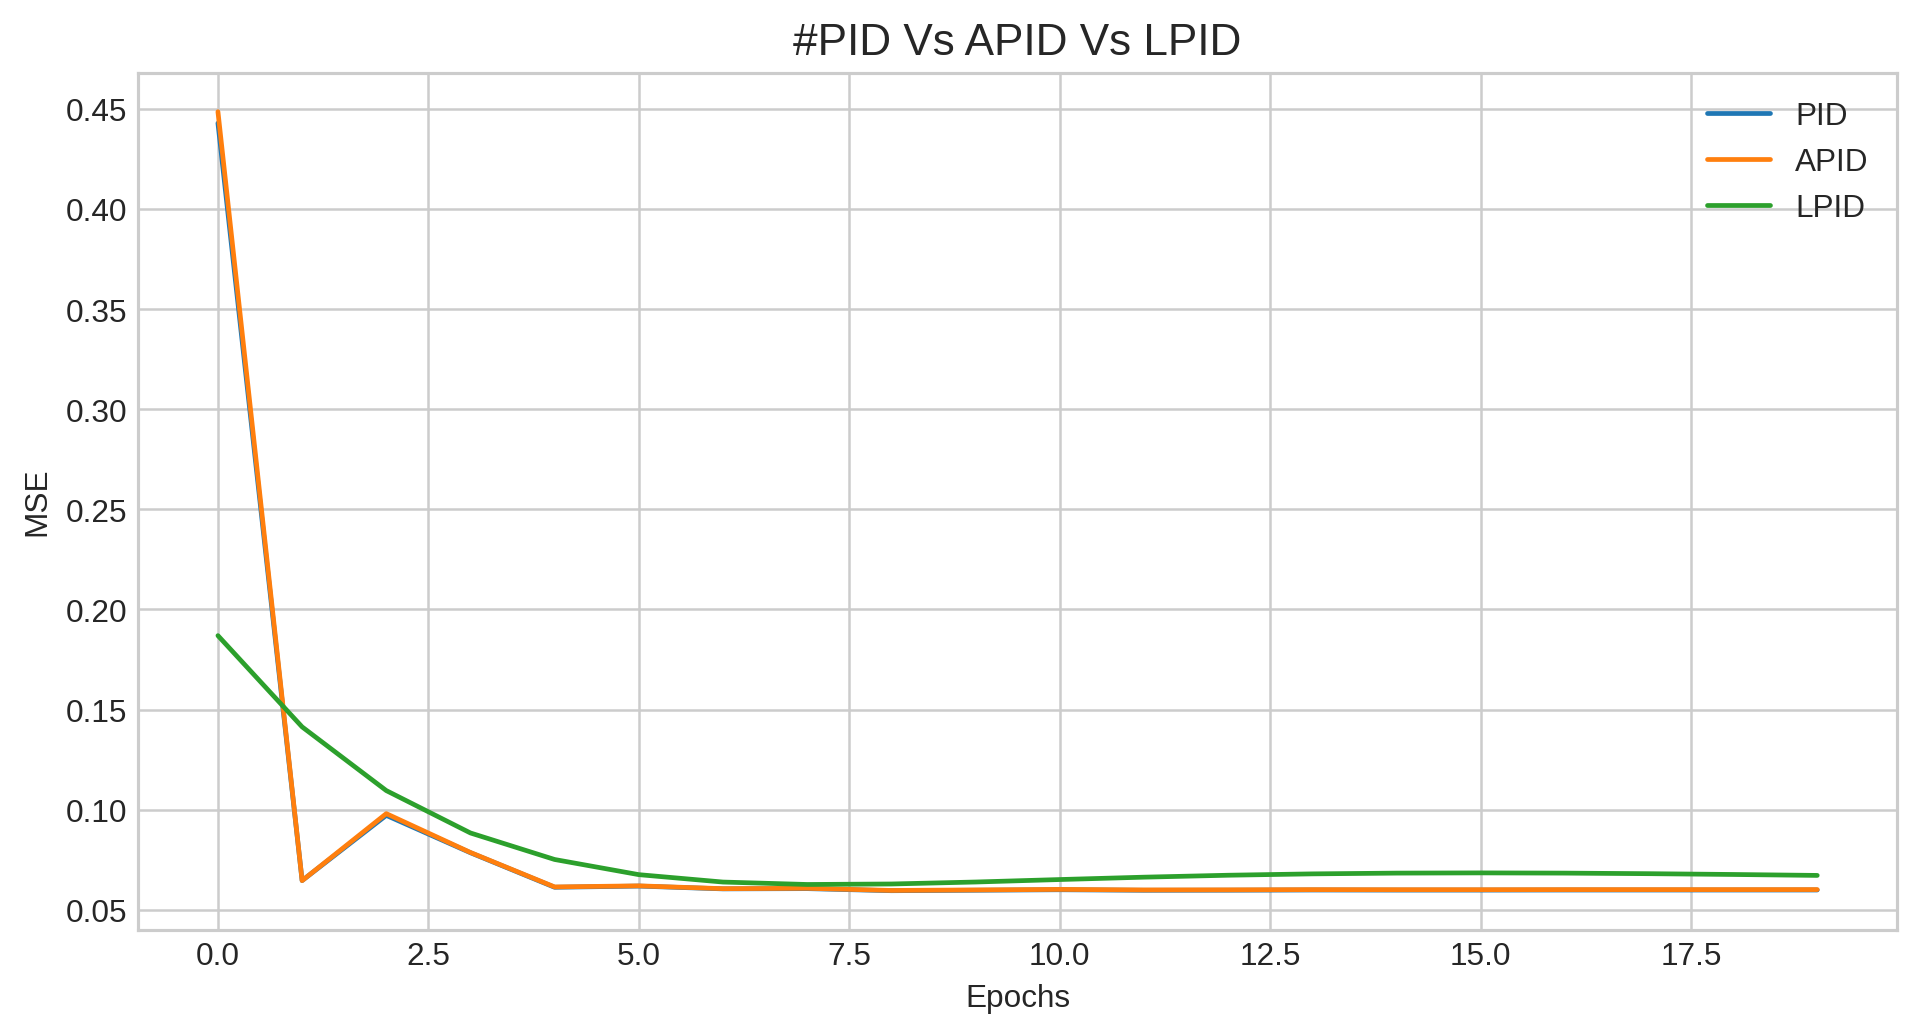

CPU times: user 422 ms, sys: 1.46 ms, total: 423 ms
Wall time: 423 ms


In [217]:
%%time
plt.figure(figsize=(10,5))
plt.rcParams['figure.dpi'] = 227
plt.plot(range(len(mse_pid)), mse_pid, label='PID')
plt.plot(range(len(mse_apid)), mse_apid, label='APID')
plt.plot(range(len(mse_lpid)), mse_lpid, label='LPID')

plt.title('#PID Vs APID Vs LPID', fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [121]:
def Adam(X, y, lr=0.05, epoch=10):
    
    m, b = 0.5, 0.5 # parameters
    log, mse = [], [] # lists to store learning process
    N = len(X) # number of samples
 
    vm,vb =0,0

    eps = 1e-8
    beta1, beta2 = 0.9, 0.999
    mmt,mvt,bmt, bvt=0,0,0,0
    mmt_hat, mvt_hat, bmt_hat, bvt_hat = 0,0,0,0

    prev_m , prev_b =0,0

    for i in range(epoch):
      dm, db =0,0

      f = y - (m*X + b)
      dm += lr * (-2 * (X*f).sum() / N)
      db +=  lr * (-2 * f.sum() / N)

      mmt = beta1*mmt + (1 - beta1) * dm
      mvt = beta2*mvt + (1 - beta2) * (dm**2)

      bmt = beta1*bmt + (1 - beta1) * db
      bvt = beta2*bvt + (1 - beta2) * (db**2)

      mmt_hat = mmt/(1- beta1**(i+1))
      mvt_hat = mvt/(1- beta2**(i+1))

      bmt_hat = bmt/(1- beta1**(i+1))
      bvt_hat = bvt/(1-beta2**(i+1))

      m = m - (lr*mmt_hat)/(np.sqrt(mvt_hat + eps))
      b = b - (lr*bmt_hat)/(np.sqrt(bvt_hat + eps))

      log.append((m, b))
      mse.append(mean_squared_error(y, (m*X + b))) 


      prev_m = m
      prev_b = b
      
    

    return m, b, log, mse

In [122]:
%%time
m, b, log, mse_adam = Adam(x,y, lr=0.01, epoch=1000)

CPU times: user 4.02 s, sys: 264 ms, total: 4.28 s
Wall time: 4.32 s


In [123]:
t

NameError: ignored

In [ ]:
y_pred = m*x + b
print("MSE:",mean_squared_error(y, y_pred))

In [ ]:
%%time
plt.figure(figsize=(10,5))
plt.rcParams['figure.dpi'] = 227
plt.plot(range(len(mse_pid)), mse_pid, label='PID')
plt.plot(range(len(mse_apid)), mse_apid, label='APID')
plt.plot(range(len(mse_lpid)), mse_lpid, label='LPID')
plt.plot(range(len(mse_adam)), mse_adam, label='ADAM')


plt.title('#PID Vs APID Vs LPID  Vs ADAM', fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()